[(300, 2), (300, 3)]


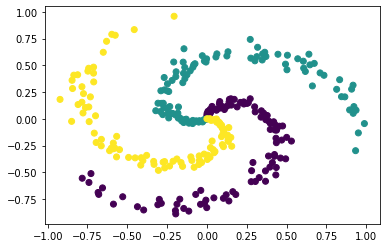

In [1]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt

# Data preparation
from dataset import spiral
x, t = spiral.load_data()
print(list(map(lambda x: np.array(x).shape, [x, t])))
plt.scatter(x[:,0], x[:,1], c=np.argmax(t, axis=1))

epoch=9000 loss=0.004974329416879112
epoch=9000 accu=1.0


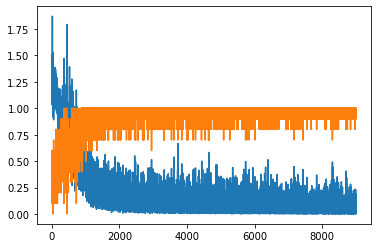

CPU times: user 1.36 s, sys: 140 ms, total: 1.5 s
Wall time: 1.29 s


In [2]:
%%time
from common.functions import softmax, sigmoid, cross_entropy_error
from common.layers import SoftmaxWithLoss, Sigmoid, Affine


class NN():
    def __init__(self, input_size, hidden_size, output_size):
        W1 = 0.01 * np.random.randn(input_size, hidden_size)
        b1 = np.zeros(hidden_size)
        W2 = 0.01 * np.random.randn(hidden_size, output_size)
        b2 = np.zeros(output_size)
        
        self.W1, self.b1, self.W2, self.b2 = W1, b1, W2, b2

        
    def predict(self, x):
        W1, b1, W2, b2 = self.W1, self.b1, self.W2, self.b2
        
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        
        self.x, self.a1, self.z1, self.a2 = x, a1, z1, a2
        return a2
    
    
    def forward(self, x, t):
        a2 = self.predict(x)
        y = softmax(a2)      
        l = cross_entropy_error(y, t)
        a = (t.argmax(axis=1)==y.argmax(axis=1)).sum() / len(t)
        
        self.y, self.t = y, t
        return l, a      
    
    def backward(self):
        y, t = self.y, self.t
        x, a1, z1, a2 = self.x, self.a1, self.z1, self.a2
        W1, b1, W2, b2 = self.W1, self.b1, self.W2, self.b2
        
        # SoftmaxWithSigma
        dout = (y - t) / len(t)
        
        # Affine 2
        dx = np.dot(dout, W2.T)
        dW2 = np.dot(z1.T, dout)
        db2 = np.sum(dout, axis=0)
        dout = dx
        
        # Sigmoid
        dout = dout * (1.0 - z1) * z1

        # Affine 1
        dx = np.dot(dout, W1.T)
        dW1 = np.dot(x.T, dout)
        db1 = np.sum(dout, axis=0)

        self.dW1, self.db1, self.dW2, self.db2 = dW1, db1, dW2, db2


    def update(self, lr):
        self.W1 -= lr * self.dW1
        self.b1 -= lr * self.db1
        self.W2 -= lr * self.dW2
        self.b2 -= lr * self.db2     

        
nn = NN(len(x[0]), 10, len(t[0]))

# Hyper parameters
epochs = 300
batch = 10
lr = 1.

# Train NN
loss_list, accu_list = [], []
for epoch in range(epochs):
    idx = np.random.permutation(len(x))
    x, t = x[idx], t[idx]
    
    for n in range(len(x)//batch):
        idx = range(n*batch, (n+1)*batch)
        xx, tt = x[idx], t[idx]
        
        l, a = nn.forward(xx, tt)
        loss_list.append(l)     
        accu_list.append(a)
        nn.backward()
        nn.update(lr)
        
# Plot accuracy over time        
print(f"epoch={len(loss_list)} loss={loss_list[-1]}")
print(f"epoch={len(loss_list)} accu={accu_list[-1]}")
plt.plot(range(len(loss_list)), loss_list)
plt.plot(range(len(accu_list)), accu_list)
plt.show()